# Project 2020
## Programming for Data Analysis
***
### Eibhinn Lee
### G00226502
***

### Problem statement
**Create a data set by simulating a real-world phenomenon of your choosing.
Use the numpy.random package to model and synthesise such data using Python.**

***Specifically, in this project you should:***
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
***

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.
***



### Dataset Info
***
For the purpose of the project, I manually created a dataset relating to the spoprt of horse racing.
To delve deeper, I created a dataset using the top 112 Steeplechasers rated from the 2019-2020 season.
To add some context, Horse Racing is split into two disciplines:
- Flat
- National Hunt

Within National Hunt racing or Jump Racing, there are 3 main types of races
- Steeplechase (Largest obstacles)
- Hurdle (Smaller obstacles)
- National Hunt flat race (no obstacles)

So, the data upcoming is from the National Hunt section of Horse Racing and to be specific, Steeplechasing.

This information can be found at the following URL with information solely taken from page 2.
https://support.racingadmin.co.uk/opencms/export/sites/weatherbys/racing-admin-support/.galleries/racing-admin-downloads/anglo-irish-jump-classification.pdf

The rationale behind creating this dataset was two-fold:
- I'm interested in the sport and
- I can randomly generate data closely related to the initial dataframe that I created.

References
***
https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

https://support.racingadmin.co.uk/opencms/export/sites/weatherbys/racing-admin-support/.galleries/racing-admin-downloads/anglo-irish-jump-classification.pdf

#### Variables used and explained
***
**Rating**
- Each racehorse that runs under the rules of racing will get a rating. If a horse has not run yet in its life, it will be restricted to certain races that will be under the same conditions for each horse until it has received a rating. Each jursdiction both sides of the Irish sea employ a team of people known as 'handicappers' who review, analyse and set ratings for racehorses. Generally, ratings are choosen by how each horse has run, the race type in ran in, the class of race, the time of the race along with other factors.

**Name**
- Every horse is named and registered with the regulatory body. Every horse has a passport to distinguish exactly is the correct horse present on the day of the race.

**Distance**
- For the dataset, I decided to classify this variable into three as given by the "ANGLO-IRISH STEEPLECHASE CLASSIFICATION". In the classification, the three groups are:

- 2 miles 7f+ 
- 2 miles 3f to 2 miles 6.5f
- 2 miles to 2 miles 2.5f

(please not a 'f' refers to furlong which is a measure used within the Sport. A furlong is 1/8th of a mile)

For my dataset,I summerise each distance in a category.I simply used:

- Staying (2 miles 7f+)
- Intermediate (2 miles 3f to 2 miles 6.5f)
- Minimum (2 miles to 2 miles 2.5f)

**Bred**
- Is a straightforward variable indicating what country the horse was bred. For official purposes, this is generally provided at the end of the horses name e.g 'FR', 'GB', 'IRE'

**Location**
This is a variable I came up with to describe where the horse is trained

**Age** 
- Age of the horse at the time of the project. All horses will offically be 1 year older on 1st January day regardless of the month they were born.

**Novice** 
- Novice is a term used to describe a horse in its first year at a discipline. In the case of the dataset, all are under the same discipline which is Steeplechase. But other disciplines are 'flat' and 'hurdles'. Generally speaking but not always the case, horses progress from flat to hurdles to steeplechases and the first year in each discipline they will be classified as a novice.

**Sex**
 - Male or Female.

### Import Libraries required.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [56]:
# Using pandas to import dataframe as a csv
# dataset saved to github


df = pd.read_csv("https://raw.githubusercontent.com/EibhinnLee/Project-2020---Programming-for-Data-Analysis/main/Horses_Dataset_Project2020.txt")

df

,Rating,Name,Distance,Bred,Location,Age,Novice,Sex
0,173,Al Boum Photo,Staying,French,IRE,8,N,Male
1,173,Cyrname,Intermediate,French,UK,8,N,Male
2,172,Santini,Staying,British,UK,8,N,Male
3,172,Chacun Pour Soi,Minimum,French,IRE,8,N,Male
4,171,Clan des Obeaux,Staying,French,UK,8,N,Male
...,...,...,...,...,...,...,...,...
108,152,Nube Negra,Minimum,Spanish,UK,6,Y,Male
109,152,Sam Brown,Intermediate,British,UK,8,Y,Male
110,152,Ordinary World,Minimum,Irish,IRE,10,N,Male
111,152,Top Notch,Intermediate,French,UK,9,N,Male


As you can see from the Dataset above, this is the manually created dataset. It specifically highlights the following:
- Rating
- Name
- Distance (for 2019)
- Bred
- Location (where the horse is trained)
- age
- novice
- sex


References
***
https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/

https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327


### Simulation

In this section, 4 new columns will be added to the orginal Dataset.

They are as follows:
- Retire - Will the horse be retired at the end of the year 2020.
- 2020_#_Runs - How many times will the horse run in the coming season
- 2020_Distance - Will the horse run over the same or different distances this season
- 2020_Rating - What will the rating of the horse be by the end of the upcoming season.

References
***

https://www.geeksforgeeks.org/how-to-add-empty-column-to-dataframe-in-pandas/

https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-constant-value

https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

In [61]:
# Adding a new column with data to original dataframe.
# results i expect are a simple 'yes' or 'no' value.

# creating a list of the values.
a = ["yes","no"]

# using the numpy.random package to randomly choose whether or not the horse will retire by the end of the upcoming season.
df['Retire'] = np.random.choice(a, len(df))

In [62]:
# Adding a second new column with data to original dataframe.
# results will vary with an expectation value of 4 which would be about average for the number of races a horse whould run in.
# This numpy.random function allows this to show that not every horse will run that many times or will in fact run more times.

# using the numpy.random.poisson function to randomly show the varying integer in and around the expectation value of 4.
df['2020_#_Runs'] = np.random.poisson(4, len(df))

In [63]:
# Adding a third new column with data to original dataframe.
# results expected are from data within the orginal dataframe imported by pandas.
# This will distinguish whether a horse will maintain the distance for the coming season or will be revert to a different distance.

# list containg the three values
b = ["Staying", "Intermediate", "Minimum"]

# using the numpy.random package to randomly choose whether the horse will remain or change distance.
df['2020_Distance'] = np.random.choice(b, len(df))

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/?ref=rp

In [64]:
# Adding a forth new column with data to original dataframe.
# using the numpy.random.poisson function
# the function will take the value in the Rating colum as N and apply the function to generate a new value
# the new value generated will be the rating the horse will receive at the end of the upcoming season.


df['2020_Rating'] = np.random.poisson(df['Rating'], len(df))

In [8]:
# df now includes original dataframe along with new columns and data
df

,Rating,Name,Distance,Bred,Location,Age,Novice,Sex,Retire,2020_#_Runs,2020_Distance,2020_Rating
0,173,Al Boum Photo,Staying,French,IRE,8,N,Male,yes,5,Minimum,184
1,173,Cyrname,Intermediate,French,UK,8,N,Male,no,5,Minimum,153
2,172,Santini,Staying,British,UK,8,N,Male,no,3,Intermediate,173
3,172,Chacun Pour Soi,Minimum,French,IRE,8,N,Male,yes,3,Staying,182
4,171,Clan des Obeaux,Staying,French,UK,8,N,Male,yes,2,Minimum,156
...,...,...,...,...,...,...,...,...,...,...,...,...
108,152,Nube Negra,Minimum,Spanish,UK,6,Y,Male,yes,4,Intermediate,152
109,152,Sam Brown,Intermediate,British,UK,8,Y,Male,yes,6,Staying,147
110,152,Ordinary World,Minimum,Irish,IRE,10,N,Male,no,2,Intermediate,151
111,152,Top Notch,Intermediate,French,UK,9,N,Male,no,5,Intermediate,141


As you can now see, the 4 new columns are now part of the Dataframe.

I used a simple function to randomly generate a yes/no field for the 'retire' column. The purpose of this is simply because the physique of a horse can be very complex and its very difficult to keep horses injury free but particularly this sport which involves jumping obstacles at speed.
A number of those horses listed will retire due to injury, perhaps they may begin to no enjoy their job or in some cases it may be fatal. But to foresee that a horse will retire is impossible such is the random selection chosen.

For the 2020_#_Runs	column, I used a distribution from the numpy.random package to take a positive integer around the figure selected which was 4. Its impossible to know for certain how many times a horse will run each year. Those who train them can be quite superstitious and will more often than not plan very similar to that of the past year depending on weather, track conditions and whether they had a good year or not. On average 4 runs each year would be on average, some more , some even less.

For this new column, 2020_Distance, I used the choices available in the 'Distance column form the original dataset and randomly chose one of the available fields. Again, very few horses will run at one distance, yes they can prefer races over a certain distance but that does not mean that they are not effective over a variety of trips. It would be unlikely to see a horse vary between te minimum distance and the Staying distance but it has been done.

2020_Rating, I used a numpy.random distribution to generate a number close to the value given in the Rating column but not necessrily too close to it. Again, this was appropriate as stated above, horses are rated after every race and ratings can fluctuate. This would be normal.

### Analysis
***

Pairplot is the introductory graph showing the variety in values across the four sections of data

- Rating
- Age
- 2020_#_Runs
- 2020 Rating

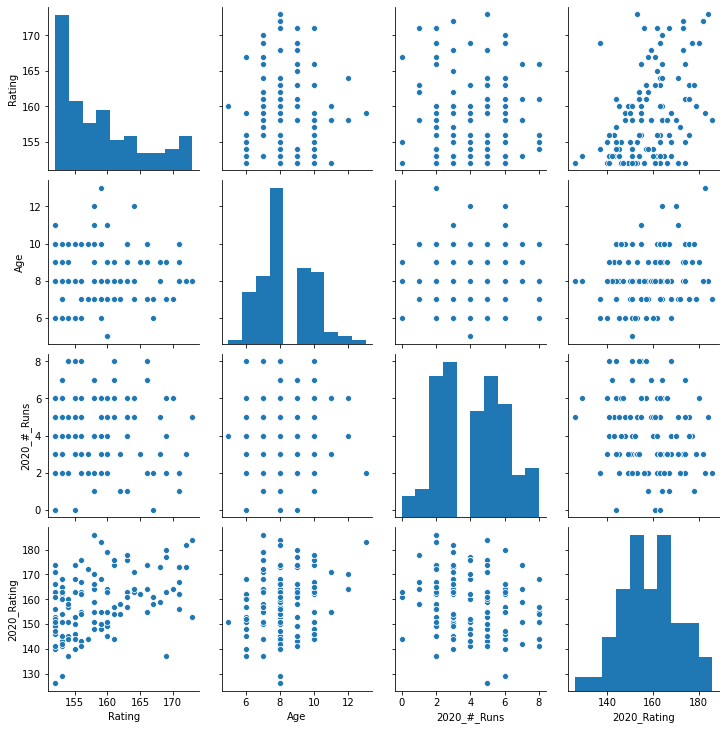

In [9]:
sns.pairplot(df)

Bar chart below show's the amount of horses bred in each country within the selected dataset.
You can see that the level of Irish bred horses is highest with French bred next.
A huge number of French horses are bought by owners/trainers each year to race in Ireland and England for National Hunt racing. This would be due to horses being suited by soft ground conditions and the training in France can often have young horses more forward in their development than in Ireland and England.
Ireland would be one of the world's leading breeders of racehorses globally for both national hunt racing and flat racing.

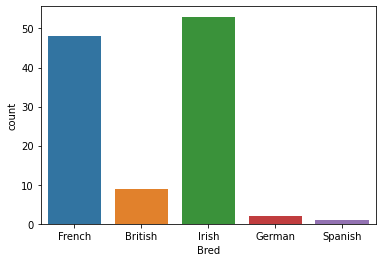

In [10]:
# Bar chart showing the amount of horses that were bred in each country
# You can see that the level of Irish bred horses is highest with French bred next.

sns.countplot(x = 'Bred', data=df)

Countplot below simply highlights where the horses on the list are trained. As you can see, it is only Ireland and the UK represented here. This would be normal particularly for National Hunt racing. Occasionally, some representatives from France will appear but in the last number of years, all the best young horses are being bought to run in either Ireland or England.

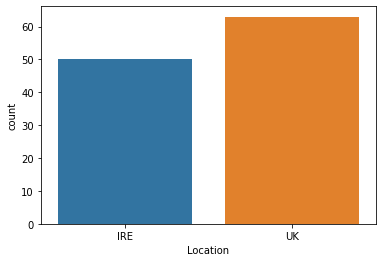

In [11]:
# The divide of where the top rated horses are trained
sns.countplot(x = 'Location', data=df)

This graph looks at the age profile of horses in the dataset. As you can see, age 8 is the most common age for horses in this dataset. That would be generally correct. There is nothing to say that the best horses are all older than 8 but in general horses would be seen in their prime between 7-9.

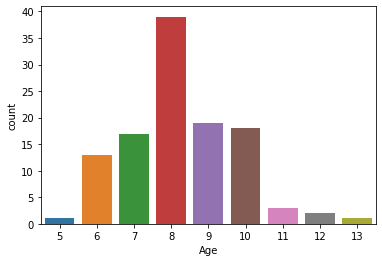

In [12]:
# Graph showing the agr profile of the horses 
sns.countplot(x = 'Age', data=df)

The next two graph's look at the number of horses running over each distance for 2019 and the second graph is the predicted number of horses running over the specific distance in 2020.

**2019**
As you can see, the numbers don't vary all that much. Between 35 and 40.
***

**2020**
There is some differences and the amounts vary much more than in 2019. Range looks to be approx. 30 - 45

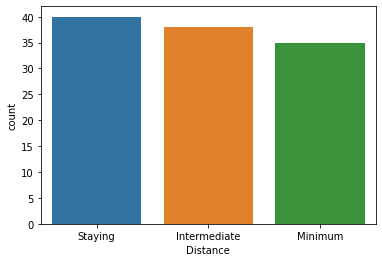

In [67]:
# 2019. Number of horses running over each distance
sns.countplot(x = 'Distance', data=df)

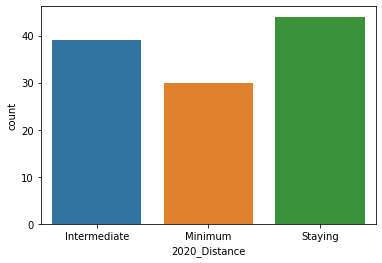

In [68]:
# predicted breakdown of the number of horses running in each distance for 2020

sns.countplot(x = '2020_Distance', data=df)

The next countplot looks at the number of horses to retire at the ned of the following year.

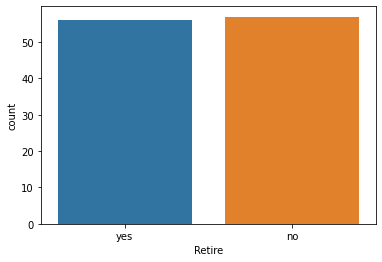

In [15]:
# number of horses to retire

sns.countplot(x = 'Retire', data=df)

This graph shows the number of horses that are Novice's. Every year horses will in the top 100+ Ratings that are novices. Life can become more challenging for horses coming out of novice company and taking on experienced older horses. It would be interesting to look into the novices named this year and analysis how many will remain in the list at the end of the coming year.

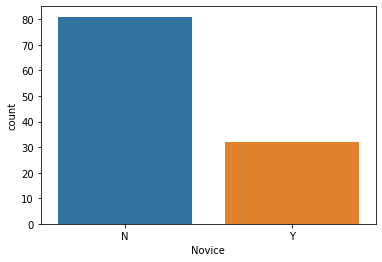

In [16]:
sns.countplot(x = 'Novice', data=df)

The scatter plot below takes 2 of the variables and plots them.
The two variables are 'Rating' & '2020_Rating'.
It gives you an idea how each horse is now rated and where it will be.
Please note all horses on the dataset are taken into account and therefore no legend would be visually appealing due to the number of horses included.

References
***
seaborn scatter plot showing the difference ratings between 2019 & 2020

https://python-graph-gallery.com/340-scatterplot-animation/

https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/

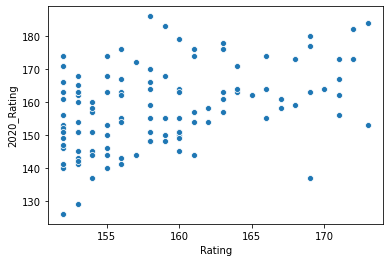

In [17]:
sns.scatterplot(x=df["Rating"], y=df["2020_Rating"])

This pairplot takes the two variables 'age' and 'rating' and looks at the age profile of horses their corresponding current rating.

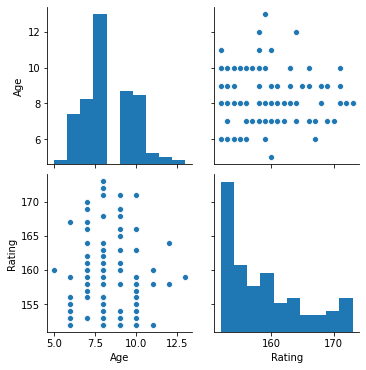

In [18]:
# Pairplot Age v Rating
sns.pairplot(df, vars=["Age", "Rating"])

This pairplot takes the two variables '2020_#_Runs' and '2020_Rating' and looks at the number of races each horse will run their corresponding future rating.

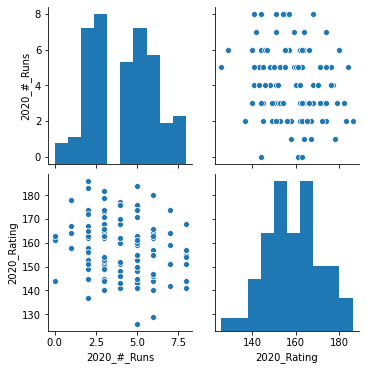

In [19]:
# Number of runs v Rating in 2020
sns.pairplot(df, vars=["2020_#_Runs", "2020_Rating"])

This plot below takes a random selection from the dataset and shows exactly the rating difference between both years by making it clear within a graph.


References
***
https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/

     Rating               Name    Bred Location  Age  2020_#_Runs  2020_Rating
44      160       Minella Indo  French      IRE    7            3          179
57      158      Peregrine Run   Irish      IRE   10            4          148
67      156   Diego du Charmil  French       UK    8            3          154
103     152  Castlegrace Paddy   Irish      IRE    9            0          163


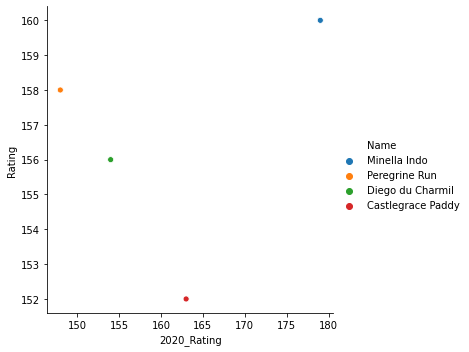

In [55]:
# create new df using all rows and a select number of columns using the iloc function
df1= df.iloc[0:113,[0,1,3,4,5,9,11]]

# rename the new df and the sample number
x = df1.sample(n=4)

plot the following variables including legend
sns.relplot(x="2020_Rating", y="Rating",hue ='Name', data=x)

print(x)

plt.show()

Similar to the above plot and df, this takes the 5 highest rated horses on the list and plots the different ratings 

Reference
***
https://pbpython.com/selecting-columns.html

   Rating             Name  2020_Rating
0     173    Al Boum Photo          184
1     173          Cyrname          153
2     172          Santini          173
3     172  Chacun Pour Soi          182
4     171  Clan des Obeaux          156


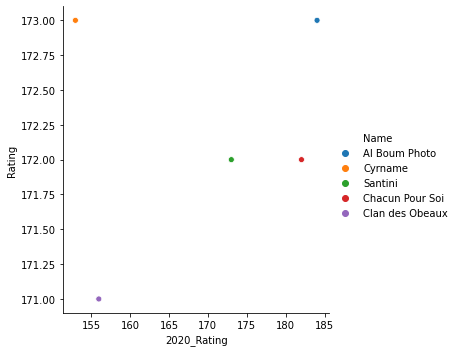

In [31]:
# creating a new df for the purpose of the analysis.
# using 3 columns and all the first 5 rows
df.iloc[0:5, [0,1,11]]

# plotting the variables
sns.relplot(x="2020_Rating", y="Rating",hue ='Name', data=df.iloc[0:5, [0,1,11]])
print(df.iloc[0:5, [0,1,11]])
plt.show()